In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../..")

In [52]:
from src.vols.heston import Heston
from src.losses.rbfmmdloss import RBFMMDLoss
from src.networks.ffn import FFNetwork
from src.networks.cnn import CNNetwork
from src.gans.ivgan import IVGan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
#set_plot_params()

In [246]:
N_paths = 100000
total_timesteps = 60*60*7.5 #1 second data
n_timesteps = 10 #train at 1 min interval

heston_model = Heston(theta=1.0, omega=0.04, xi=1.0, rho=0.0)
spots, vols = heston_model.generate(N_paths, total_timesteps, n_timesteps, reshape_for_rnn=True)

In [247]:
true_samples = (spots[:,-1,0] - spots[:,0,0])/np.sqrt(tf.squeeze(heston_model.integrated_variance()))

In [280]:
critic = FFNetwork(3,h_dims= 264,input_shape = (64))
generator = CNNetwork(int(n_timesteps), 1, 1)

In [281]:
WGAN = IVGan(critic,generator)

In [282]:
history = WGAN.train(x_train = spots, true_sample = true_samples, num_epochs = 5, batch_size = 264, lr=0.00005, clip= 0.0001 )

Epoch 1 of 5:   0%|          | 0/378 [00:00<?, ?it/s]

Epoch 2 of 5:   0%|          | 0/378 [00:00<?, ?it/s]

Epoch 3 of 5:   0%|          | 0/378 [00:00<?, ?it/s]

Epoch 4 of 5:   0%|          | 0/378 [00:00<?, ?it/s]

Epoch 5 of 5:   0%|          | 0/378 [00:00<?, ?it/s]

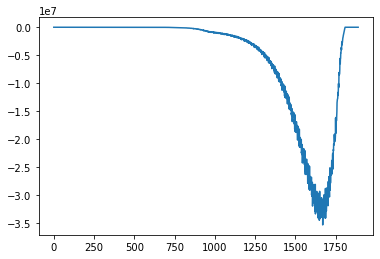

In [283]:
plt.plot(history["generator_loss"])

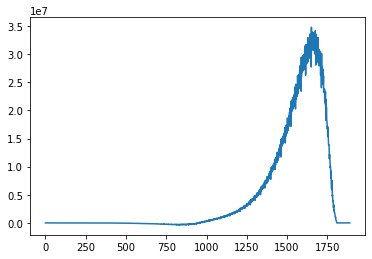

In [284]:
plt.plot(history["critic_loss"])